# Daily Challenge: Web Scraping and Data Visualization
Your Task

Instructions

- Use this webpage : Tel Aviv - [BBC Weather](https://www.bbc.com/weather/293397)

- Scrape the Webpage: Use Python libraries like Selenium to interact with the webpage and BeautifulSoup to parse the HTML, Extract relevant data such as dates, numerical values, categories, etc., Organize the scraped data into a structured format.

- Data Analysis with Pandas:

    - Load your scraped data into a Pandas DataFrame.
    - Clean and preprocess the data if necessary (handling missing values, type conversion, etc.).
    - Perform basic analysis, such as calculating averages, totals, or trends over time.

- Data Visualization with Seaborn and Matplotlib:

    - Use Seaborn and Matplotlib to create visualizations that provide insights into the data.
    - Examples of visualizations can include line plots for trends over time, bar charts for comparing categories, or heatmaps for showing data density.
    - Ensure your visualizations are well-labeled with clear titles, axis labels, and legends where appropriate.

- Document Your Findings:

    - Create a report summarizing your methodology, analysis, and insights from the visualizations.
    - Explain any interesting patterns or insights derived from your data.


In [3]:
# stats and math
import pandas as pd
import numpy as np

# scrapping & stuff
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# setup Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")  # Open browser in maximized mode
driver = webdriver.Chrome(options=options)

# BBC Weather page
url = "https://www.bbc.com/weather/293397"
driver.get(url)

# wait for the specific weather card element to load
wait = WebDriverWait(driver, 30)

try:
    # get current weather
    # wait for the current weather card element to be present
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "div#wr-forecast.wr-forecast div.wr-day-container--clear-sky-night div.wr-day-carousel__viewport div.wr-day-carousel__scrollable ol.wr-day-carousel__list li.wr-day--0 a#daylink-0.wr-day__content")))
    print("Successfully accessed the current weather card body.")

    # get the html content of the current weather card
    weather_card_body_html = driver.find_element(By.CSS_SELECTOR, "div#wr-forecast.wr-forecast div.wr-day-container--clear-sky-night div.wr-day-carousel__viewport div.wr-day-carousel__scrollable ol.wr-day-carousel__list li.wr-day--0 a#daylink-0.wr-day__content").get_attribute('outerHTML')
    print("Retrieved outer html of the current weather card body.")

    # parse html content with BeautifulSoup for current weather
    soup_current = BeautifulSoup(weather_card_body_html, 'html.parser')
    print("Parsed html content with BeautifulSoup for current weather.")


    # get hourly weather
    # wait for the hourly weather list element to be present
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.wr-time-slot-container__slots div.wr-time-slot-list.wr-time-slot-list--day-0")))
    print("Successfully accessed the hourly weather list.")

    # get the html content of the hourly weather list
    hourly_list_html = driver.find_element(By.CSS_SELECTOR, "div.wr-time-slot-container__slots div.wr-time-slot-list.wr-time-slot-list--day-0").get_attribute('outerHTML')
    print("Retrieved outer html of the hourly weather list.")

    # parse html content with BeautifulSoup for hourly weather
    soup_hourly = BeautifulSoup(hourly_list_html, 'html.parser')
    print("Parsed html content with BeautifulSoup for hourly weather.")

except Exception as e:
    print(f"An error occurred: {e}")

# Shut the driver
driver.quit()

Successfully accessed the current weather card body.
Retrieved outer html of the current weather card body.
Parsed html content with BeautifulSoup for current weather.
Successfully accessed the hourly weather list.
Retrieved outer html of the hourly weather list.
Parsed html content with BeautifulSoup for hourly weather.


In [93]:
# just in case

# save soup_current as an html file
with open("soup_current.html", "w", encoding="utf-8") as file:
    file.write(soup_current.prettify())

# save soup_hourly as an htnl file
with open("soup_hourly.html", "w", encoding="utf-8") as file:
    file.write(soup_hourly.prettify())

Get current weather conditions

In [37]:
# retrieve the weather type description
weather_description_element = soup_current.find(class_="wr-day__weather-type-description")
weather_description = weather_description_element.get_text(strip=True) if weather_description_element else None
print(f"Weather Description: {weather_description}")

# retrieve temperature from current_short
current_short_element = soup_current.find(class_="wr-value--temperature--c")
current_short = current_short_element.get_text(strip=True) if current_short_element else None

print(f"Current Short: {current_short}")


Weather Description: A clear sky and light winds
Current Short: 13°


Get hourly conditions

In [60]:
# Find all time slots in soup_hourly
time_slots = soup_hourly.find_all(class_="wr-time-slot wr-js-time-slot")

# Create a list to hold the dictionaries for each time slot
time_slot_dicts = []

# Iterate through each time slot and create an empty dictionary
for slot in time_slots:
    time_slot_dict = {}  # Create an empty dictionary for each time slot
    time_slot_dicts.append(time_slot_dict)

In [69]:
# Find all time slots in soup_hourly
# we will select all 'li' elements with class 'wr-time-slot'
time_slots = soup_hourly.find_all('li', class_="wr-time-slot")

# empty dictionary list
time_slot_dicts = []

# sweep through each time slot and create a dictionary
for slot in time_slots:
    # create an empty dictionary for each time slot
    time_slot_dict = {}
    

    # find the hour element within the current time slot
    hour_element = slot.find(class_="wr-time-slot-primary__time")
    # extract hour & store it in the dictionary
    hour_text = hour_element.get_text(strip=True)
    time_slot_dict['hour'] = hour_text


    # find the temperature element within the current time slot
    temperature_element = slot.find(class_="wr-value--temperature--c")
    # extract temperature & store it in the dictionary
    temperature_text = temperature_element.get_text(strip=True)
    time_slot_dict['temperature'] = temperature_text


    # find the precipitation element within the current time slot
    precipitation_element = slot.find(class_="wr-time-slot-primary__precipitation")
    if precipitation_element:  # Check if it exists
        precipitation_text = precipitation_element.get_text(strip=True)
        # Extract only the percentage value (first part of the text)
        precipitation_percentage = precipitation_text.split('%')[0] + '%'
        time_slot_dict['precipitation'] = precipitation_percentage
    

    # append the dictionary to the list
    time_slot_dicts.append(time_slot_dict)

# # check out
# print(time_slot_dicts)

# make dataframe from dictionaries
df_time_slots = pd.DataFrame(time_slot_dicts)
display(df_time_slots)

,hour,temperature,precipitation
0,01:00,13°,0%
1,02:00,13°,0%
2,03:00,13°,0%
3,04:00,13°,0%
4,05:00,13°,0%


Cleaning:

In [85]:
df_cleaned = df_time_slots.copy()

# transform the hour column to extract hour from 'HH:MM'
df_cleaned['hour'] = df_cleaned['hour'].str.split(':').str[0].astype(int)  # Extract hour and convert to integer

# transform the temperature column
df_cleaned['temperature (C)'] = df_cleaned['temperature'].str.replace('°', '').astype(float)  # Remove '°' and convert to float

# transform the precipitation column
df_cleaned['precipitation chance (%)'] = df_cleaned['precipitation'].str.replace('%', '').astype(float)  # Remove '%' and convert to float

# drop the original columns that are no longer needed
df_cleaned.drop(columns=['temperature', 'precipitation'], inplace=True)

# cleaned df
display(df_cleaned)

,hour,temperature (C),precipitation chance (%)
0,1,13.0,0.0
1,2,13.0,0.0
2,3,13.0,0.0
3,4,13.0,0.0
4,5,13.0,0.0


In [86]:
print('the stats are:')
print(df_cleaned.describe())

the stats are:
           hour  temperature (C)  precipitation chance (%)
count  5.000000              5.0                       5.0
mean   3.000000             13.0                       0.0
std    1.581139              0.0                       0.0
min    1.000000             13.0                       0.0
25%    2.000000             13.0                       0.0
50%    3.000000             13.0                       0.0
75%    4.000000             13.0                       0.0
max    5.000000             13.0                       0.0


Doesn't really make sense to make a statistic analysis with values that are going to change...

Cold weather with an avg temp of 13C, stable with null std. No chance of precip.

In case of few falues, uncomment the cell below for a better range of values in the plots:

In [87]:
# # dummy df in case of bad values:
# data = {
#     'hour': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
#     'temperature (C)': [12.0, 11.5, 11.0, 10.5, 10.0, 9.5, 9.0, 10.5, 12.0, 14.0, 16.0, 18.0],
#     'precipitation chance (%)': [5, 10, 15, 20, 25, 20, 15, 10, 45, 00, 5, 20]
# }

# df_cleaned = pd.DataFrame(data)

# display(df_cleaned)

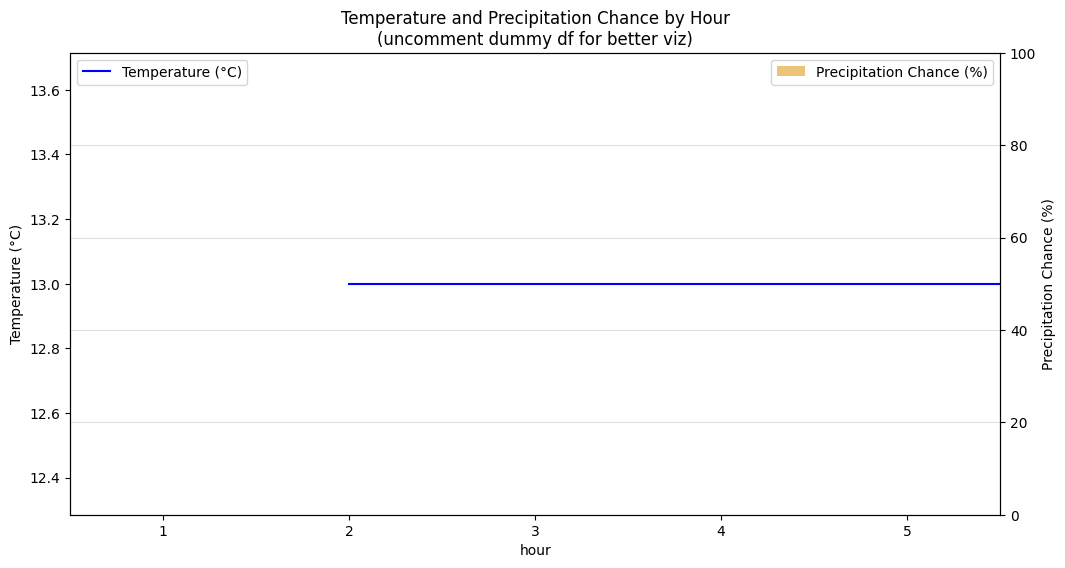

In [96]:
# create fig with axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# temperature as a line plot
sns.lineplot(data=df_cleaned, x='hour', y='temperature (C)', ax=ax1, color='blue', label='Temperature (°C)')
ax1.set_ylabel('Temperature (°C)', color='k')
ax1.tick_params(axis='y', labelcolor='k')

# make a second y axis for precipitation
ax2 = ax1.twinx()
sns.barplot(data=df_cleaned, x='hour', y='precipitation chance (%)', ax=ax2, color='orange', alpha=0.6, label='Precipitation Chance (%)')
ax2.set_ylabel('Precipitation Chance (%)', color='k')
ax2.set_ylim(0, 100)
ax2.tick_params(axis='y', labelcolor='k')

# titles and legends
plt.title('Temperature and Precipitation Chance by Hour\n(uncomment dummy df for better viz)')
plt.grid(True, alpha=0.4)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# release the kraken
plt.show()

# Report

- The current_data and next_hours data for temperature (C) and chance of rain (%) were scrapped from [here](https://www.bbc.com/weather/293397) using selenium, and stored in the variables `soup_current` and `soup_hourly` using beautifulsoup. After that, they were exported as html by using `open`.

- The next hours data was cleaned and their stats were printed. After that, they were ploted as a combined axis chart of tempereature and precip. chance vs hour.

- The retrieved weather data is very poor and doesn't have many variations. There is a dummy dataframe to appreciate better the plot, which cell is commented.

- There is room for improvement, in the webpage there is much more data to scrap:

    - The 'next days' field in the webpage is much richer to be scrapped
    - While scrapping the 'next hours' data, the button wasn't pushed to retrieve also data like humidity, pressure or visibility. Also the button to 'See more weather for Tuesday 17th>' wasn't pushed.

- It's 2:26 AM and I am not gonna scrap those extremelly interesting fields